In [ ]:
# ASSIGNMENT -- 04
# QUESTION -- 01

In [ ]:

from google.colab import files

uploaded = files.upload()


Saving delivery_time.csv to delivery_time.csv


In [ ]:
import pandas as pd
dt=pd.read_csv('/content/delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt.shape

(21, 2)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

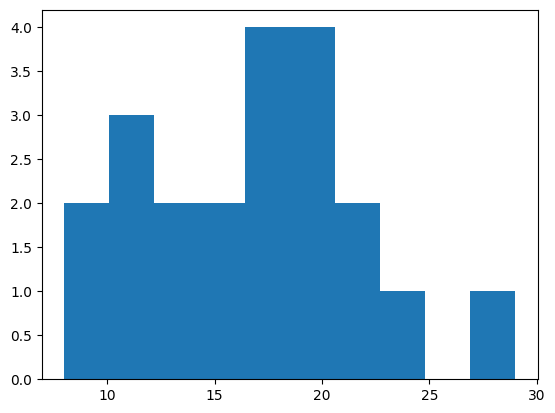

In [ ]:
plt.hist(dt['Delivery Time'])
plt.show()

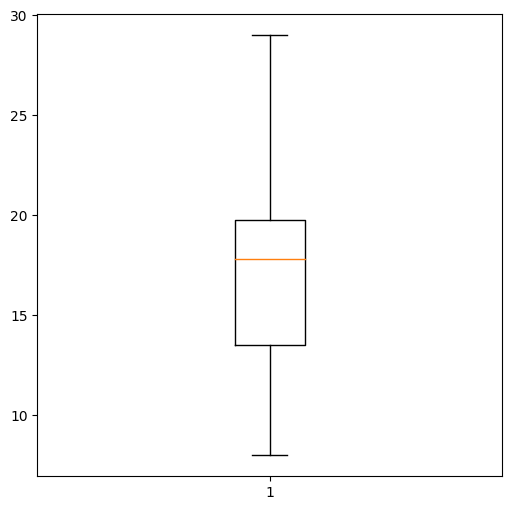

In [ ]:
plt.figure(figsize=(6,6))
plt.boxplot(dt['Delivery Time'])
plt.show()

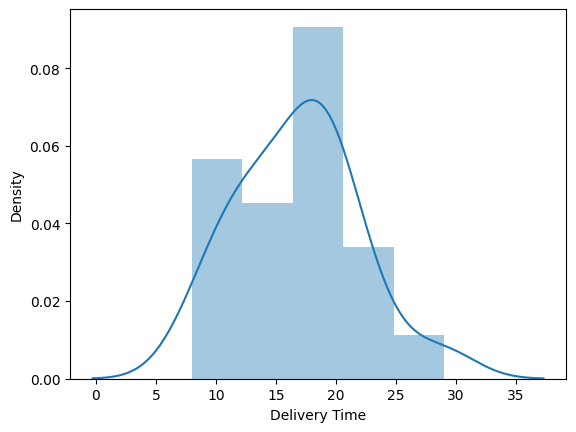

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(dt['Delivery Time'])
plt.show()

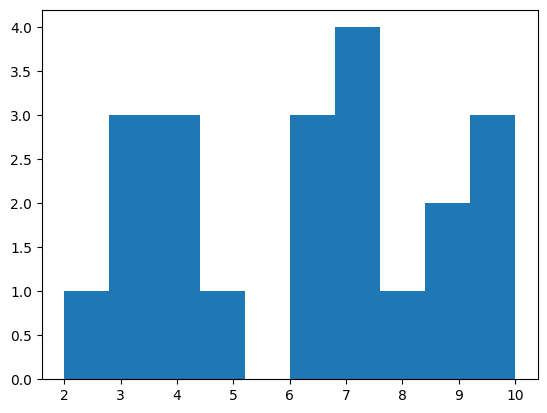

In [ ]:
plt.hist(dt['Sorting Time'])
plt.show()

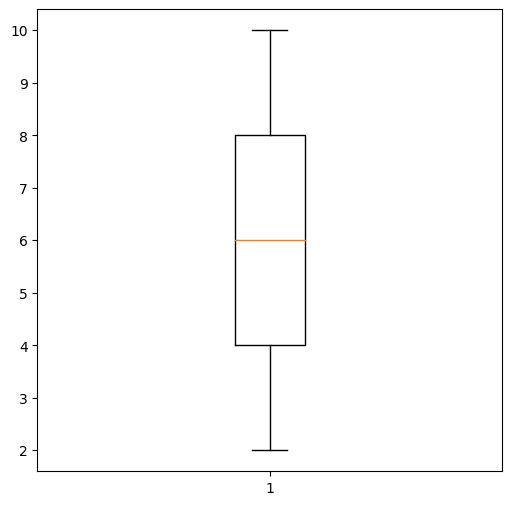

In [ ]:
plt.figure(figsize=(6,6))
plt.boxplot(dt['Sorting Time'])
plt.show()

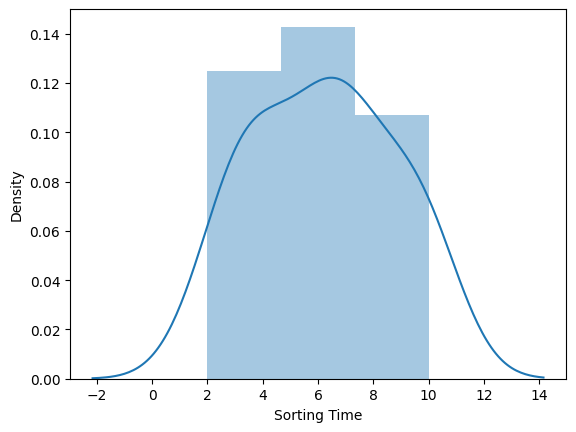

In [ ]:
sns.distplot(dt['Sorting Time'])
plt.show()

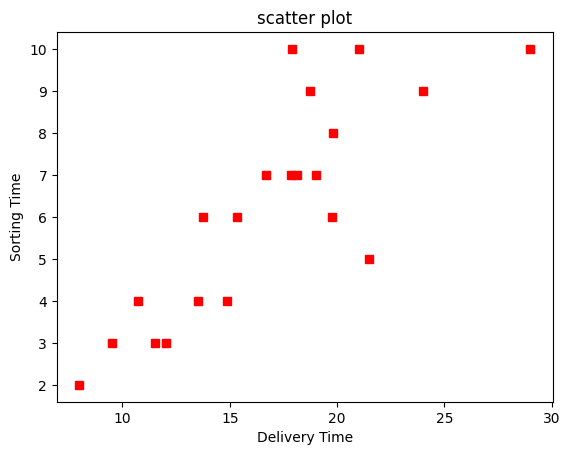

In [ ]:
plt.plot(dt['Delivery Time'],dt['Sorting Time'], 'rs')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.title('scatter plot')
plt.show()

In [ ]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("dt['Delivery Time']~dt['Sorting Time']",data=dt).fit()
model.params

Intercept             6.582734
dt['Sorting Time']    1.649020
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     dt['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Wed, 21 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                         09:26:46   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5827      1.722      3.823      0.001       2.979      10.186
dt['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
pred = model.predict(dt['Sorting Time'])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
print(model.conf_int(0.05))

                           0          1
Intercept           2.979134  10.186334
dt['Sorting Time']  1.108673   2.189367


In [ ]:
rmse_lin = np.sqrt(np.mean((np.array(dt['Sorting Time'])-np.array(pred))**2))
rmse_lin

10.72205239210456

Text(0, 0.5, 'Delivery Time')

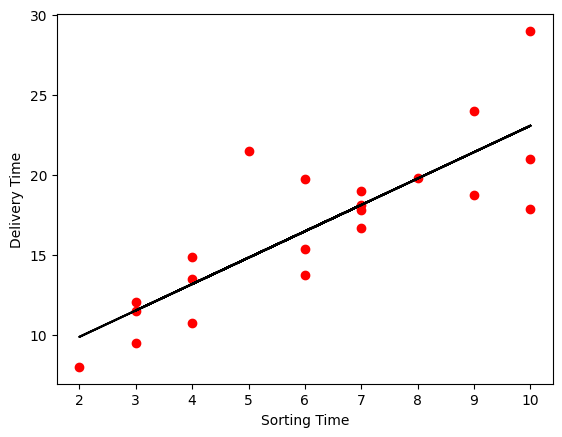

In [ ]:
plt.scatter(x=dt['Sorting Time'],y=dt['Delivery Time'],color='red')
plt.plot(dt['Sorting Time'],pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [ ]:
import statsmodels.formula.api as smf
model1=smf.ols("dt['Sorting Time']~dt['Delivery Time']",data=dt).fit()
model1.params

Intercept             -0.756673
dt['Delivery Time']    0.413744
dtype: float64

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dt['Sorting Time']   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        09:34:58   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.7567      1.134     -0.667      0.513      -3.130       1.617
dt['Delivery Time']     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred1 = model.predict(dt['Sorting Time'])
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'Delivery Time')

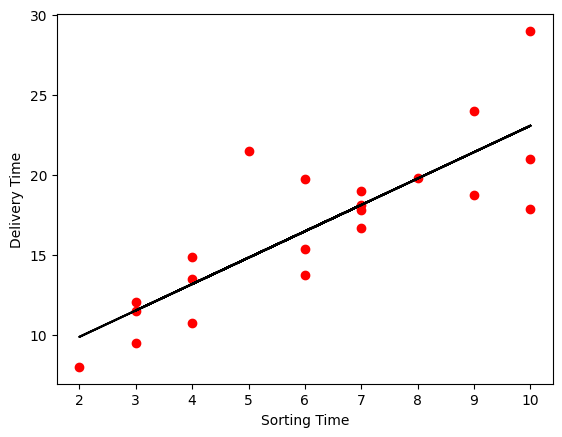

In [ ]:
plt.scatter(x=dt['Sorting Time'],y=dt['Delivery Time'],color='red')
plt.plot(dt['Sorting Time'],pred,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [ ]:
rmse_log = np.sqrt(np.mean((np.array(dt['Sorting Time'])-np.array(pred1))**2))
rmse_log

10.72205239210456

In [ ]:
pred1.corr(dt['Sorting Time'])

0.9999999999999998

Text(0, 0.5, 'Delivery Time')

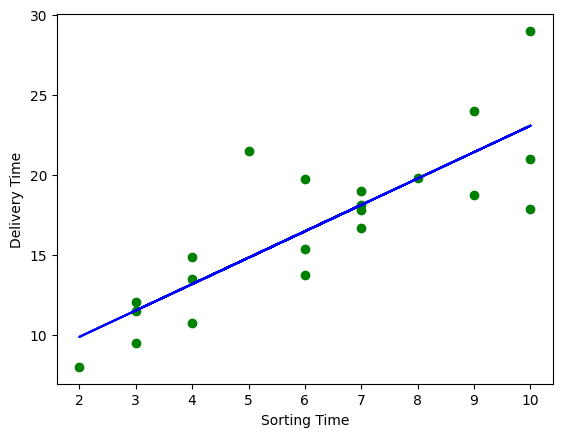

In [ ]:
plt.scatter(x=dt['Sorting Time'],y=dt['Delivery Time'],color='green')
plt.plot(dt['Sorting Time'],pred1,color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [ ]:
model2 = smf.ols('np.log(dt["Delivery Time"])~dt["Sorting Time"]',data=dt).fit()
model2.params
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log(dt["Delivery Time"])   R-squared:                       0.711
Model:                                     OLS   Adj. R-squared:                  0.696
Method:                          Least Squares   F-statistic:                     46.73
Date:                         Wed, 21 Feb 2024   Prob (F-statistic):           1.59e-06
Time:                                 09:37:46   Log-Likelihood:                 7.7920
No. Observations:                           21   AIC:                            -11.58
Df Residuals:                               19   BIC:                            -9.495
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.1214      0.103     20.601      0.000       1.906       2.337
dt["Sorting Time"]     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_log = model2.predict(pd.DataFrame(dt["Sorting Time"]))

In [ ]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [ ]:
pred2=np.exp(pred_log)

In [ ]:
pred2

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [ ]:
rmse_exp = np.sqrt(np.mean((np.array(dt['Sorting Time'])-np.array(pred1))**2))
rmse_exp

10.72205239210456

In [ ]:
pred2.corr(dt['Sorting Time'])

0.9930106686392963

Text(0, 0.5, 'Sorting Time')

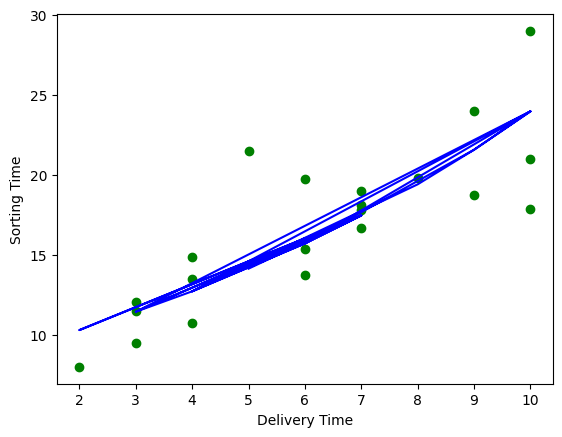

In [ ]:
plt.scatter(x=dt['Sorting Time'],y=dt['Delivery Time'],color='green')
plt.plot(dt['Sorting Time'],pred2,color='blue')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

In [ ]:
dt["sorting_time_sq"]=dt["Sorting Time"]*dt["Sorting Time"]
dt

,Delivery Time,Sorting Time,sorting_time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [ ]:
model_quad = smf.ols("np.log(dt['Delivery Time'])~sorting_time_sq", data= dt).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log(dt['Delivery Time'])   R-squared:                       0.621
Model:                                     OLS   Adj. R-squared:                  0.601
Method:                          Least Squares   F-statistic:                     31.18
Date:                         Wed, 21 Feb 2024   Prob (F-statistic):           2.20e-05
Time:                                 09:41:00   Log-Likelihood:                 4.9564
No. Observations:                           21   AIC:                            -5.913
Df Residuals:                               19   BIC:                            -3.824
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4290      0.076     32.014      0.000       2.270       2.588
sorting_time_sq     0.0078      0.001      5.584      0.000       0.005       0.011
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.004
Skew:                           0.033   Prob(JB):                        0.998
Kurtosis:                       3.000   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_quad.resid

0    -0.161911
1     0.049279
2     0.274262
3     0.119328
4     0.160863
5     0.022224
6     0.134484
7    -0.247700
8    -0.321633
9    -0.127532
10    0.060630
11   -0.178504
12    0.004255
13   -0.056645
14   -0.011588
15    0.146608
16   -0.087853
17    0.086509
18   -0.380680
19    0.070927
20    0.444676
dtype: float64

In [ ]:
pred_quad = model_quad.predict(dt)
pred4 = np.exp(pred_quad)
pred4

0     24.690864
1     12.850853
2     15.012631
3     21.300397
4     24.690864
5     15.012631
6     16.609171
7     12.170215
8     24.690864
9     21.300397
10    18.663435
11    12.850853
12    16.609171
13    12.170215
14    12.170215
15    12.850853
16    15.012631
17    16.609171
18    11.706230
19    16.609171
20    13.782187
dtype: float64

In [ ]:
pred3 = dt['Sorting Time']

In [ ]:
rmse_quad = np.sqrt(np.mean((np.array(dt['Sorting Time'])-np.array(pred3))**2))
rmse_quad

0.0

Text(0, 0.5, 'Standardized Residual')

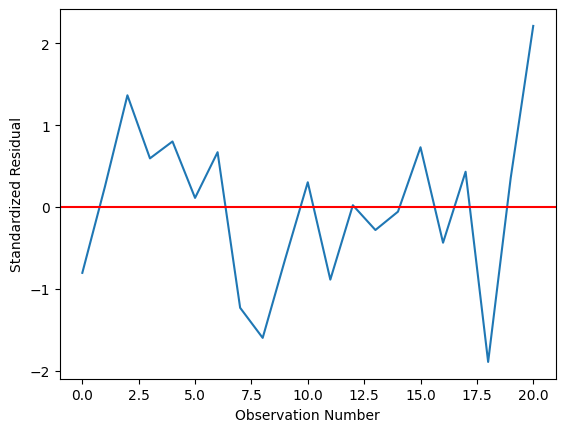

In [ ]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

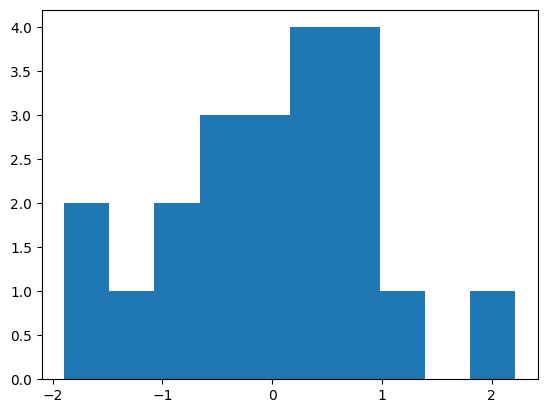

In [ ]:
plt.hist(model_quad.resid_pearson)
plt.show()

In [ ]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,10.722052,0.682271
1,rmse_log,10.722052,0.710948
2,rmse_exp,10.722052,0.682271
3,rmse_quad,0.000000,0.621331


In [ ]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

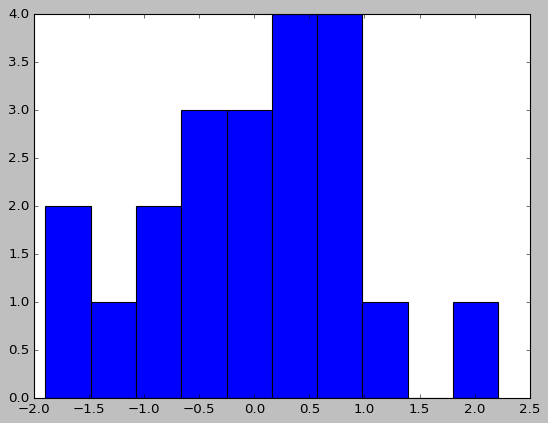

In [ ]:
plt.hist(model_quad.resid_pearson)
plt.show()

In [2]:
# ASSIGNMENT NUMBER -- 04
# QUESTION NUMBER -- 02

In [3]:
sd=pd.read_csv('')
sd

FileNotFoundError: [Errno 2] No such file or directory: 'Salary_Data.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sd=pd.read_csv('/Salary_Data.csv')
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
sd.shape

(30, 2)

In [6]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
sd.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

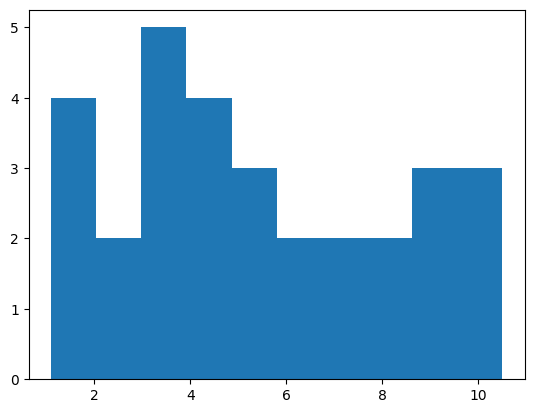

In [9]:
plt.hist(sd['YearsExperience'])
plt.show

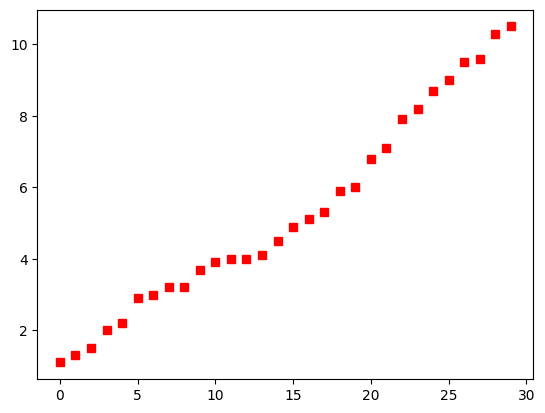

In [10]:
plt.plot(sd['YearsExperience'],'rs')
plt.show()

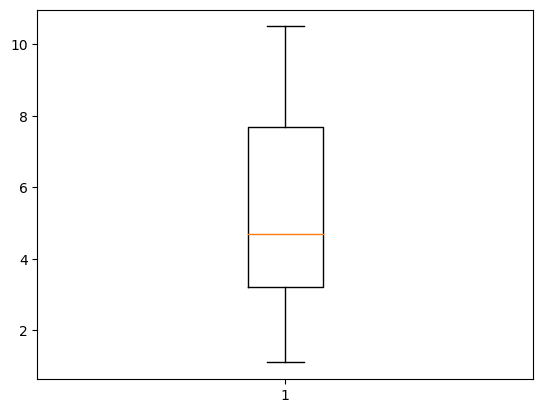

In [11]:
plt.boxplot(sd['YearsExperience'])
plt.show()

<ipython-input-12-d9d4e66e223d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['YearsExperience'])


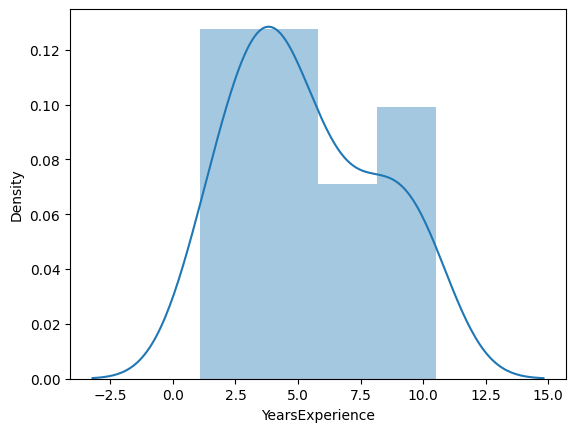

In [12]:
sns.distplot(sd['YearsExperience'])
plt.show()

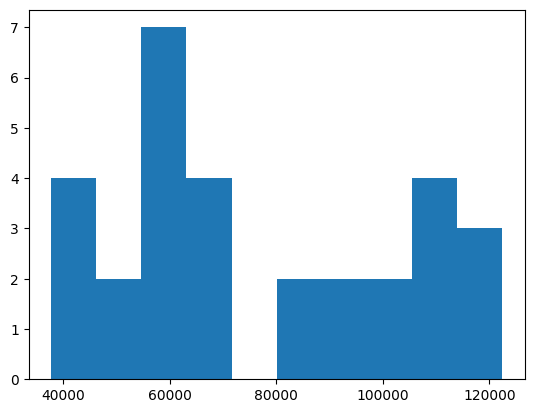

In [13]:
plt.hist(sd['Salary'])
plt.show()

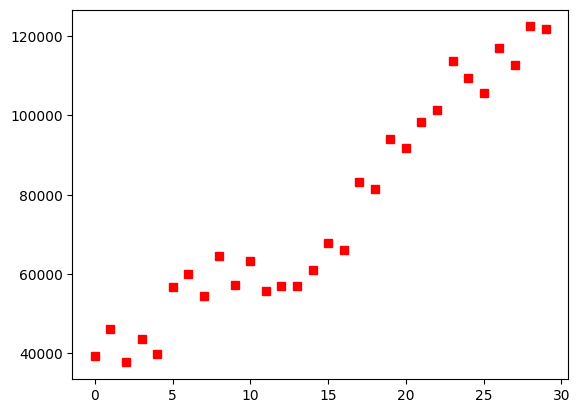

In [14]:
plt.plot(sd['Salary'],'rs')
plt.show()

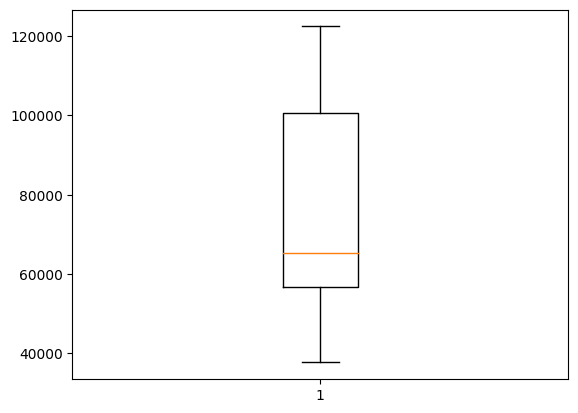

In [15]:
plt.boxplot(sd['Salary'])
plt.show()

<ipython-input-16-296cfd7bc514>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Salary'])


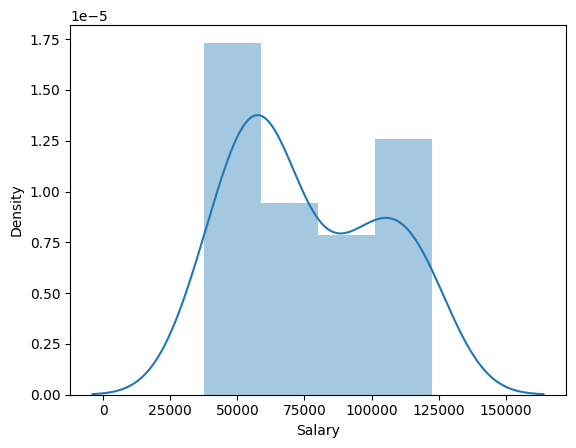

In [16]:
sns.distplot(sd['Salary'])
plt.show()

In [17]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [18]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=sd).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        16:45:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PREDICT FOR THE NEW DATA POINT



In [20]:
#predict for 1 and 3 years of experience
newdata=pd.Series([3,5])
newdata

0    3
1    5
dtype: int64

In [21]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])
data_pred

,YearsExperience
0,3
1,5


In [22]:
model.predict(data_pred)


0    54142.087163
1    73042.011806
dtype: float64